In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("21.csv")

In [4]:
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [5]:
df.drop(columns="ApplicationDate", inplace=True)  #removing the date

In [6]:
df.isnull().sum()  #no missing values found

Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyL

In [7]:
df.duplicated().sum()  #no duplicates found

np.int64(0)

In [8]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [9]:
df.dtypes

Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncome                 float64
UtilityBills

# Strings to Int

In [10]:
print("EmpStatus:\t",df["EmploymentStatus"].unique())
print("Education:\t",df["EducationLevel"].unique())
print("MaritalSt:\t",df["MaritalStatus"].unique())
print("HomeOwnership:\t",df["HomeOwnershipStatus"].unique())
print("LoanPurpose:\t",df["LoanPurpose"].unique())

EmpStatus:	 ['Employed' 'Self-Employed' 'Unemployed']
Education:	 ['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
MaritalSt:	 ['Married' 'Single' 'Divorced' 'Widowed']
HomeOwnership:	 ['Own' 'Mortgage' 'Rent' 'Other']
LoanPurpose:	 ['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


In [11]:
strDf = df.copy()

In [12]:
strDf["EmploymentStatus"] = np.where(strDf["EmploymentStatus"] == "Employed", 0, strDf["EmploymentStatus"])
strDf["EmploymentStatus"] = np.where(strDf["EmploymentStatus"] == "Self-Employed", 1, strDf["EmploymentStatus"])
strDf["EmploymentStatus"] = np.where(strDf["EmploymentStatus"] == "Unemployed", 2, strDf["EmploymentStatus"])
strDf["EmploymentStatus"] = strDf["EmploymentStatus"].astype(int)

strDf["EducationLevel"] = np.where(strDf["EducationLevel"] == "Master", 0, strDf["EducationLevel"])
strDf["EducationLevel"] = np.where(strDf["EducationLevel"] == "Associate", 1, strDf["EducationLevel"])
strDf["EducationLevel"] = np.where(strDf["EducationLevel"] == "Bachelor", 2, strDf["EducationLevel"])
strDf["EducationLevel"] = np.where(strDf["EducationLevel"] == "High School", 3, strDf["EducationLevel"])
strDf["EducationLevel"] = np.where(strDf["EducationLevel"] == "Doctorate", 4, strDf["EducationLevel"])
strDf["EducationLevel"] = strDf["EducationLevel"].astype(int)

strDf["MaritalStatus"] = np.where(strDf["MaritalStatus"] == "Married", 0, strDf["MaritalStatus"])
strDf["MaritalStatus"] = np.where(strDf["MaritalStatus"] == "Single", 1, strDf["MaritalStatus"])
strDf["MaritalStatus"] = np.where(strDf["MaritalStatus"] == "Divorced", 2, strDf["MaritalStatus"])
strDf["MaritalStatus"] = np.where(strDf["MaritalStatus"] == "Widowed", 3, strDf["MaritalStatus"])
strDf["MaritalStatus"] = strDf["MaritalStatus"].astype(int)

strDf["HomeOwnershipStatus"] = np.where(strDf["HomeOwnershipStatus"] == "Own", 0, strDf["HomeOwnershipStatus"])
strDf["HomeOwnershipStatus"] = np.where(strDf["HomeOwnershipStatus"] == "Mortgage", 1, strDf["HomeOwnershipStatus"])
strDf["HomeOwnershipStatus"] = np.where(strDf["HomeOwnershipStatus"] == "Rent", 2, strDf["HomeOwnershipStatus"])
strDf["HomeOwnershipStatus"] = np.where(strDf["HomeOwnershipStatus"] == "Other", 3, strDf["HomeOwnershipStatus"])
strDf["HomeOwnershipStatus"] = strDf["HomeOwnershipStatus"].astype(int)

strDf["LoanPurpose"] = np.where(strDf["LoanPurpose"] == "Home", 0, strDf["LoanPurpose"])
strDf["LoanPurpose"] = np.where(strDf["LoanPurpose"] == "Debt Consolidation", 1, strDf["LoanPurpose"])
strDf["LoanPurpose"] = np.where(strDf["LoanPurpose"] == "Education", 2, strDf["LoanPurpose"])
strDf["LoanPurpose"] = np.where(strDf["LoanPurpose"] == "Other", 3, strDf["LoanPurpose"])
strDf["LoanPurpose"] = np.where(strDf["LoanPurpose"] == "Auto", 4, strDf["LoanPurpose"])
strDf["LoanPurpose"] = strDf["LoanPurpose"].astype(int)

In [13]:
strDf.to_csv("Str_To_Int.csv", index=False)

# One-Hot Classifications

In [14]:
df = pd.get_dummies(df, columns=["EmploymentStatus"], prefix=["EmpStat"], dtype=int)
df = pd.get_dummies(df, columns=["EducationLevel"], prefix=["EdLevel"], dtype=int)
df = pd.get_dummies(df, columns=["MaritalStatus"], prefix=["MaritalStat"], dtype=int)
df = pd.get_dummies(df, columns=["HomeOwnershipStatus"], prefix=["HomeStat"], dtype=int)
df = pd.get_dummies(df, columns=["LoanPurpose"], prefix=["LoanPurpose"], dtype=int)

df = df[[col for col in df.columns if col != "LoanApproved"] + ["LoanApproved"]]
df = df[[col for col in df.columns if col != "RiskScore"] + ["RiskScore"]]

df.to_csv("One-Hot.csv", index=False)

# Boxplot

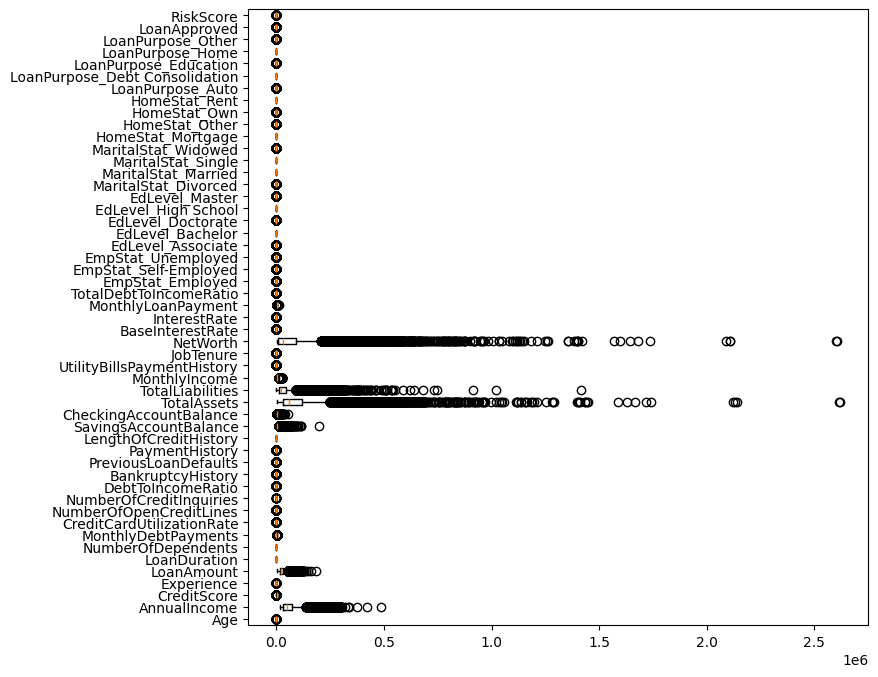

In [15]:
plt.figure(figsize=(8, 8))
plt.boxplot(df, vert=False)
plt.yticks(range(1, len(df.columns)+1), df.columns)
plt.show()

# Splitting

In [16]:
X_train_OH, X_temp_OH, y_train_OH, y_temp_OH = train_test_split(df.iloc[:,:-2], df.iloc[:,-2:], test_size=0.4, stratify=df["LoanApproved"], random_state=42)
X_valid_OH, X_test_OH, y_valid_OH, y_test_OH = train_test_split(X_temp_OH, y_temp_OH, test_size=0.5, stratify=y_temp_OH["LoanApproved"], random_state=42)

In [17]:
train_OH = pd.concat([X_train_OH, y_train_OH], axis=1)
valid_OH = pd.concat([X_valid_OH, y_valid_OH], axis=1)
test_OH = pd.concat([X_test_OH, y_test_OH], axis=1)

In [18]:
train_OH.to_csv("Train_Orig_OH.csv", index=False)
valid_OH.to_csv("Valid_Orig_OH.csv", index=False)
test_OH.to_csv("Test_Orig_OH.csv", index=False)

In [19]:
X_train_Int, X_temp_Int, y_train_Int, y_temp_Int = train_test_split(strDf.iloc[:,:-2], strDf.iloc[:,-2:], test_size=0.4, stratify=df["LoanApproved"], random_state=42)
X_valid_Int, X_test_Int, y_valid_Int, y_test_Int = train_test_split(X_temp_Int, y_temp_Int, test_size=0.5, stratify=y_temp_Int["LoanApproved"], random_state=42)

train_Int = pd.concat([X_train_Int, y_train_Int], axis=1)
valid_Int = pd.concat([X_valid_Int, y_valid_Int], axis=1)
test_Int = pd.concat([X_test_Int, y_test_Int], axis=1)

train_Int.to_csv("Train_Orig_Int.csv", index=False)
valid_Int.to_csv("Valid_Orig_Int.csv", index=False)
test_Int.to_csv("Test_Orig_Int.csv", index=False)

# Scaling

In [20]:
scalar = StandardScaler()
scalar.fit(train_Int[train_Int.columns])

StandardScaler()

In [21]:
train_Int[train_Int.columns] = scalar.transform(train_Int[train_Int.columns])
valid_Int[train_Int.columns] = scalar.transform(valid_Int)
test_Int[train_Int.columns] = scalar.transform(test_Int)

In [22]:
train_Int.to_csv("Train_Scaled_Int.csv", index=False)
valid_Int.to_csv("Valid_Scaled_Int.csv", index=False)
test_Int.to_csv("Test_Scaled_Int.csv", index=False)